In [53]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [59]:
# Pricing a call for a Tesla stock with Monte-Carlo

S = 178.08 # Current stock price (June, 2nd, 2024)
K = 185 # Strike price
sigma = 0.4597 # volatility
r = 0.0525 # risk-free interest rate
N = 5 # number of time steps 
M = 1000 # Number of simulations -> increase to 10000 to get more accurate result (but less readible graph)
T = ((datetime.date(2024,6,7)-datetime.date.today()).days)/365 # Time before maturity in years

cmp = 1.66 # call current market price on Yahoo finance

Constant volatility model

In [60]:
dt = T/N # time steps
logSo = np.log(S)

Z = np.random.normal(size = (N,M)) # independant Normal distributions N(0,1) in a matrix of size (N,M)
Z = dt*(r-0.5*sigma**2) + sigma*np.sqrt(dt)*Z# Transformation of the normal law to fit with ln(St)'s law
logSt = logSo + np.cumsum(Z, axis = 0) # log-stock prices
logSt = np.concatenate((np.full(shape = (1,M), fill_value=logSo), logSt)) # We just add ln(SO) as the first value for each timeserie
St = np.exp(logSt) # Stock prices

Payoffs = np.maximum(0,St[-1]-K) # Payoff at maturity
c = np.exp(-r*T)*np.sum(Payoffs)/M# Call price from Monte Carlo



print("Call value is : ${}".format(np.round(c,2)))
    


Call value is : $1.68


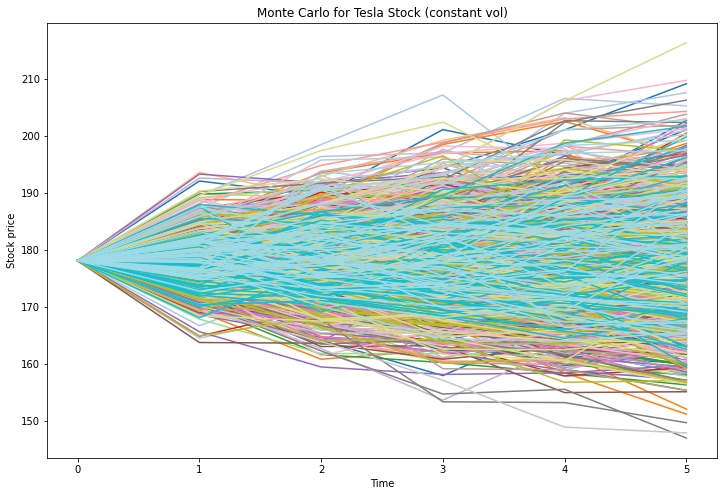

In [61]:
colors = cm.get_cmap('tab20',M)
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(St[:, i], color=colors(i))

plt.xlabel('Time')
plt.ylabel('Stock price')
plt.title('Monte Carlo for Tesla Stock (constant vol)')


plt.show()

Stochastic volatility model (Heston)

The goal here is just to show how we implement Monte-Carlo for a stock if we assume Heston stochastic volatility model

If you want to see how I calibrate Heston model, you can have a look at my Github project named Stoch_vol.ipynb
https://github.com/BafodeDansoko/Option_pricing_model

![Screenshot 2024-06-02 at 16.58.38.png](<attachment:Screenshot 2024-06-02 at 16.58.38.png>)
![Screenshot 2024-06-02 at 16.58.55.png](<attachment:Screenshot 2024-06-02 at 16.58.55.png>)
![To generate and Z, with correlation p, first generate two independent.png](<attachment:To generate and Z, with correlation p, first generate two independent.png>)
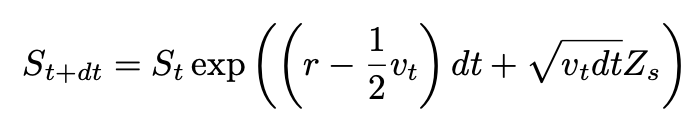
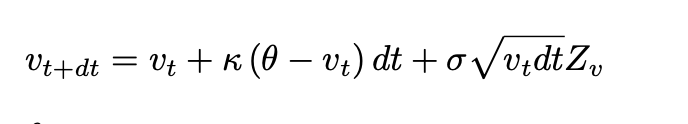
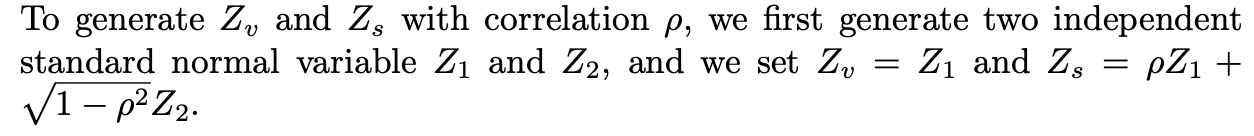

In [71]:
# We change dt and N here as we want smaller step to simulate a path

N = 20
dt = T/N

rho = 0.2 
kappa = 0.05
r = 0.01
theta = 0.037
v0 = 0.2
sigma = 0.3


mu = np.array([0,0])
cov = np.array([[1,rho],[rho,1]]) # Covariance between the normal distribution of the stock price, and the normal distribution of the vol
S_prices = np.full(shape = (N+1,M), fill_value = S) # Stock prices over time
variances = np.full(shape = (N+1,M), fill_value = v0) # Stock volatility over time
Z_sv = np.random.multivariate_normal(mu,cov,(N,M)) # Simulation of the correlated normal distributions

for i in range(1,N+1):
    S_prices[i] = S_prices[i-1]*np.exp((r-0.5*variances[i-1])*dt+np.sqrt(variances[i-1]*dt)*Z_sv[i-1,:,0])
    variances[i] = np.maximum(variances[i-1] + kappa*(theta-variances[i-1])*dt + sigma*np.sqrt(variances[i-1]*dt)*Z_sv[i-1,:,1],0)




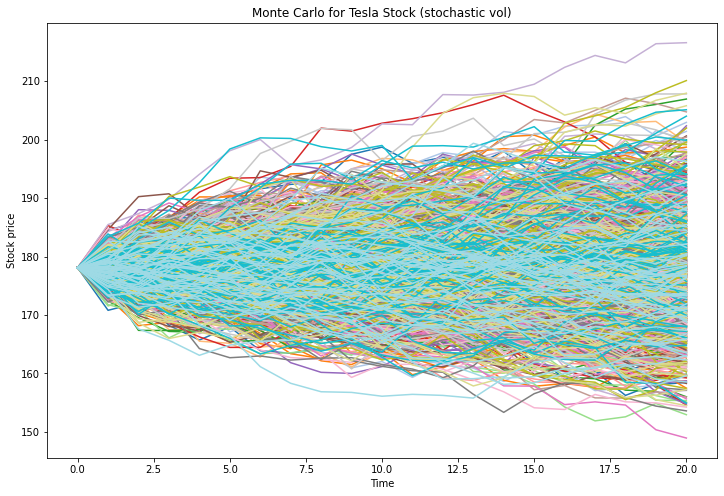

In [72]:
colors = cm.get_cmap('tab20',M)
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(S_prices[:, i], color=colors(i))

plt.xlabel('Time')
plt.ylabel('Stock price')
plt.title('Monte Carlo for Tesla Stock (stochastic vol)')


plt.show()

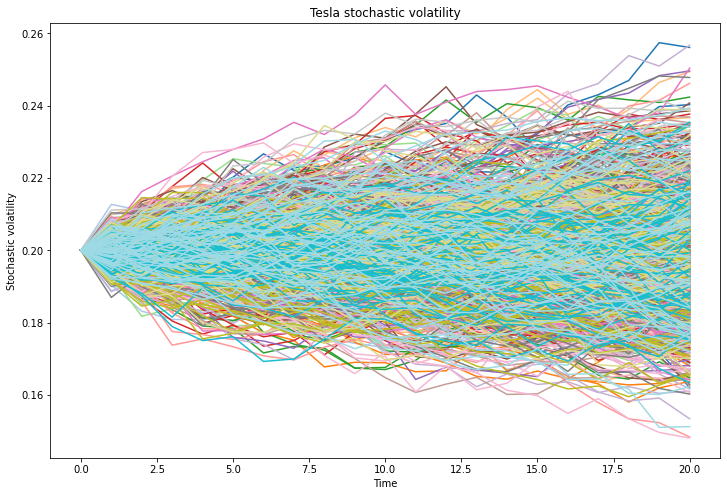

In [73]:
colors = cm.get_cmap('tab20',M)
plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(variances[:, i], color=colors(i))

plt.xlabel('Time')
plt.ylabel('Stochastic volatility')
plt.title('Tesla stochastic volatility')


plt.show()